In [ ]:
# Transfer_Learning_VGG16_Resnet50

# The Upper Conv Chunks of VGG, have full clarity on broad shapes, sizes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2, os

In [ ]:
# Download VGG without cat layers
vgg_notop_224 = tf.keras.applications.VGG16(include_top=False, input_shape=(224,224, 3))

In [ ]:
vgg_notop_224.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_notop_150 = tf.keras.applications.VGG16(include_top=False, input_shape=(150,150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_notop_150.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Download Cat & Dog dataset
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle
import kaggle
! kaggle competitions download -c dogs-vs-cats
! unzip -q dogs-vs-cats.zip
! unzip -q train.zip

 98% 797M/812M [00:06<00:00, 155MB/s]
100% 812M/812M [00:06<00:00, 134MB/s]


In [ ]:
! rm sampleSubmission.csv #test1.zip

In [ ]:
# Flow from DataFrame
# make a dataframe which contains filename and label
df = pd.DataFrame(columns=['filename', 'label'])
df["filename"] = os.listdir("train/")

In [ ]:
# 25000 - Total
# 24000 - Train (21600 - Train , 2400 Val)
#  1000 - Test

In [ ]:
df.head(5)

,filename,label
0,cat.3813.jpg,NaN
1,cat.8154.jpg,NaN
2,cat.4013.jpg,NaN
3,cat.10730.jpg,NaN
4,cat.12268.jpg,NaN


In [ ]:
df["filename"].str.split(".", expand=True)[0]

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
24995    cat
24996    cat
24997    cat
24998    cat
24999    dog
Name: 0, Length: 25000, dtype: object

In [ ]:
df["label"] = df["filename"].str.split(".", expand = True)[0]

In [ ]:
df.head()

,filename,label
0,cat.3813.jpg,cat
1,cat.8154.jpg,cat
2,cat.4013.jpg,cat
3,cat.10730.jpg,cat
4,cat.12268.jpg,cat


In [ ]:
df["test_image"] = None

In [ ]:
df.loc[np.random.randint(0, 25000-1, 1000), "test_image"] = True

In [ ]:
df.sample(5)

,filename,label,test_image
21750,cat.856.jpg,cat,None
12947,cat.3659.jpg,cat,None
2230,dog.5747.jpg,dog,None
11173,cat.4258.jpg,cat,None
21567,cat.3351.jpg,cat,None


In [ ]:
df.loc[df.test_image == True].shape

(979, 3)

In [ ]:
df.shape

(25000, 3)

In [ ]:
df.loc[df.test_image != True].shape

(24021, 3)

In [ ]:
# We have to use the preprocessing from VGG itself, we cant use our own preprocessing function

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split = 0.1)

In [ ]:
batch_size = 64

In [ ]:
train_idg = idg.flow_from_dataframe(df.loc[df.test_image != True], directory="train/", x_col="filename", y_col="label",
                                    target_size=(150, 150), batch_size=batch_size,
                                    subset='training')

Found 21619 validated image filenames belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(df.loc[df.test_image != True], directory="train/", x_col="filename", y_col="label",
                                    target_size=(150, 150), batch_size=batch_size,
                                    subset='validation')

Found 2402 validated image filenames belonging to 2 classes.


In [ ]:
# Freeze the Conv Chuncks
for layer in vgg_notop_150.layers:
  print(layer.name, layer.trainable)
#trainable = true, denotes that BP should update the parameters

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
for layer in vgg_notop_150.layers:
  layer.trainable = False

In [ ]:
for layer in vgg_notop_150.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# Functional Keras Model
# Seq - model -> model.add -> model.add -> model.add
# Fun -
# Create_a_layer (layer_from_which_input_is_expected_for_this_particular_layer)
# layer1
# layer2 (layer1)
# layer3 (layer2)
# layer4 (layer3)


# VGG Conv Layers --> vgg_notop_150
# Flatten
# Dense1
# Output

# 4*4*512(8192) -->  128   --> 2
flat = tf.keras.layers.Flatten() (vgg_notop_150.output)
dense1 = tf.keras.layers.Dense(128, activation='relu') (flat)
output = tf.keras.layers.Dense(2, activation="softmax") (dense1)

In [ ]:
final_model = tf.keras.models.Model(inputs=[vgg_notop_150.input], outputs=[output])

In [ ]:
vgg_notop_150.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

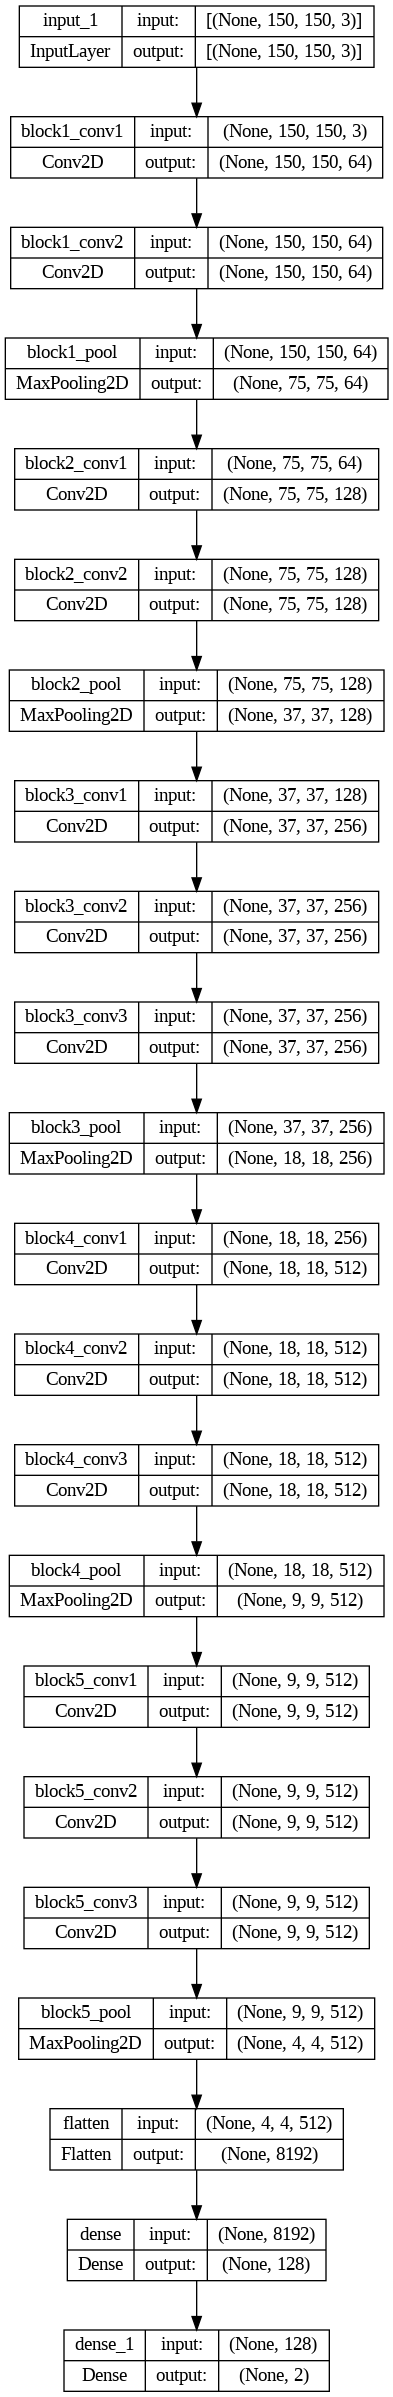

In [ ]:
tf.keras.utils.plot_model(final_model, show_shapes=True, show_layer_names=True)

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.SGD(),
                    loss=tf.keras.losses.categorical_crossentropy,
                    metrics=["acc"])

In [ ]:
final_model.fit(train_idg, batch_size=batch_size, validation_data=val_idg, epochs=15)

Epoch 1/15
338/338 [==============================] - 74s 186ms/step - loss: 2.0107 - acc: 0.9525 - val_loss: 0.0841 - val_acc: 0.9700
Epoch 2/15
338/338 [==============================] - 57s 168ms/step - loss: 0.0570 - acc: 0.9790 - val_loss: 0.0824 - val_acc: 0.9704
Epoch 3/15
338/338 [==============================] - 57s 169ms/step - loss: 0.0334 - acc: 0.9880 - val_loss: 0.0910 - val_acc: 0.9692
Epoch 4/15
338/338 [==============================] - 58s 171ms/step - loss: 0.0177 - acc: 0.9938 - val_loss: 0.1089 - val_acc: 0.9713
Epoch 5/15
338/338 [==============================] - 62s 182ms/step - loss: 0.0103 - acc: 0.9966 - val_loss: 0.1277 - val_acc: 0.9692
Epoch 6/15
338/338 [==============================] - 57s 168ms/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.1351 - val_acc: 0.9721
Epoch 7/15
338/338 [==============================] - 59s 173ms/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.1523 - val_acc: 0.9713
Epoch 8/15
338/338 [==============================] - 5

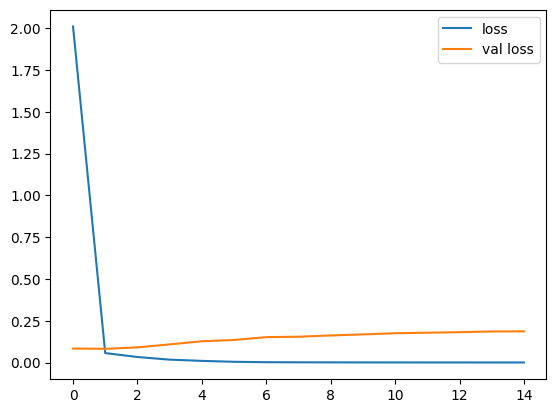

In [ ]:
plt.plot(final_model.history.history["loss"], label="loss")
plt.plot(final_model.history.history["val_loss"], label="val loss")
plt.legend()

In [ ]:
# Get test image
! unzip -q test1.zip

In [ ]:
test_image = cv2.imread("test1/1300.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (150, 150))

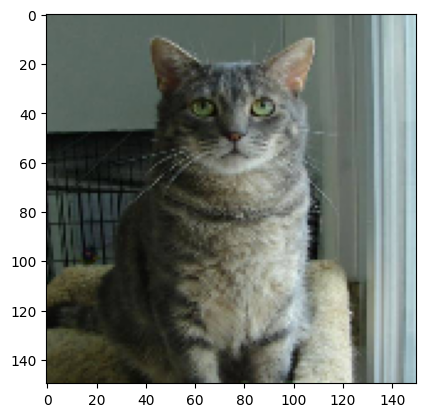

In [ ]:
plt.imshow(test_image)

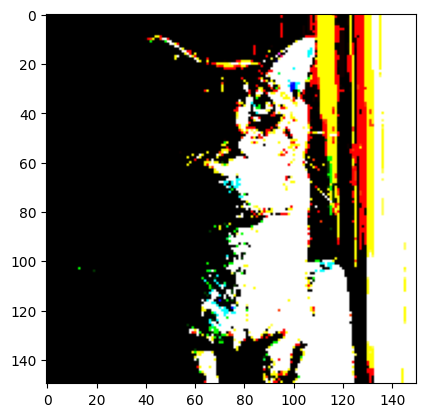

In [ ]:
test_image = tf.keras.applications.vgg16.preprocess_input(test_image)
plt.imshow(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis=0)

In [ ]:
test_image.shape

(1, 150, 150, 3)

In [ ]:
final_model.predict(test_image)

1/1 [==============================] - 1s 637ms/step


array([[1., 0.]], dtype=float32)

In [ ]:
train_idg.class_indices

{'cat': 0, 'dog': 1}